## Detailed Code Explanation

The detailed code explanation for this article is available at the following link:

https://www.daniweb.com/programming/computer-science/tutorials/542030/image-analysis-using-openai-gpt-4o-model-ipynb

For my other articles for Daniweb.com, please see this link:

https://www.daniweb.com/members/1235222/usmanmalik57

## Importing Required Libraries

In [19]:
import os
import base64
from IPython.display import display, HTML
from IPython.display import Image
from openai import OpenAI

## General Image Analysis

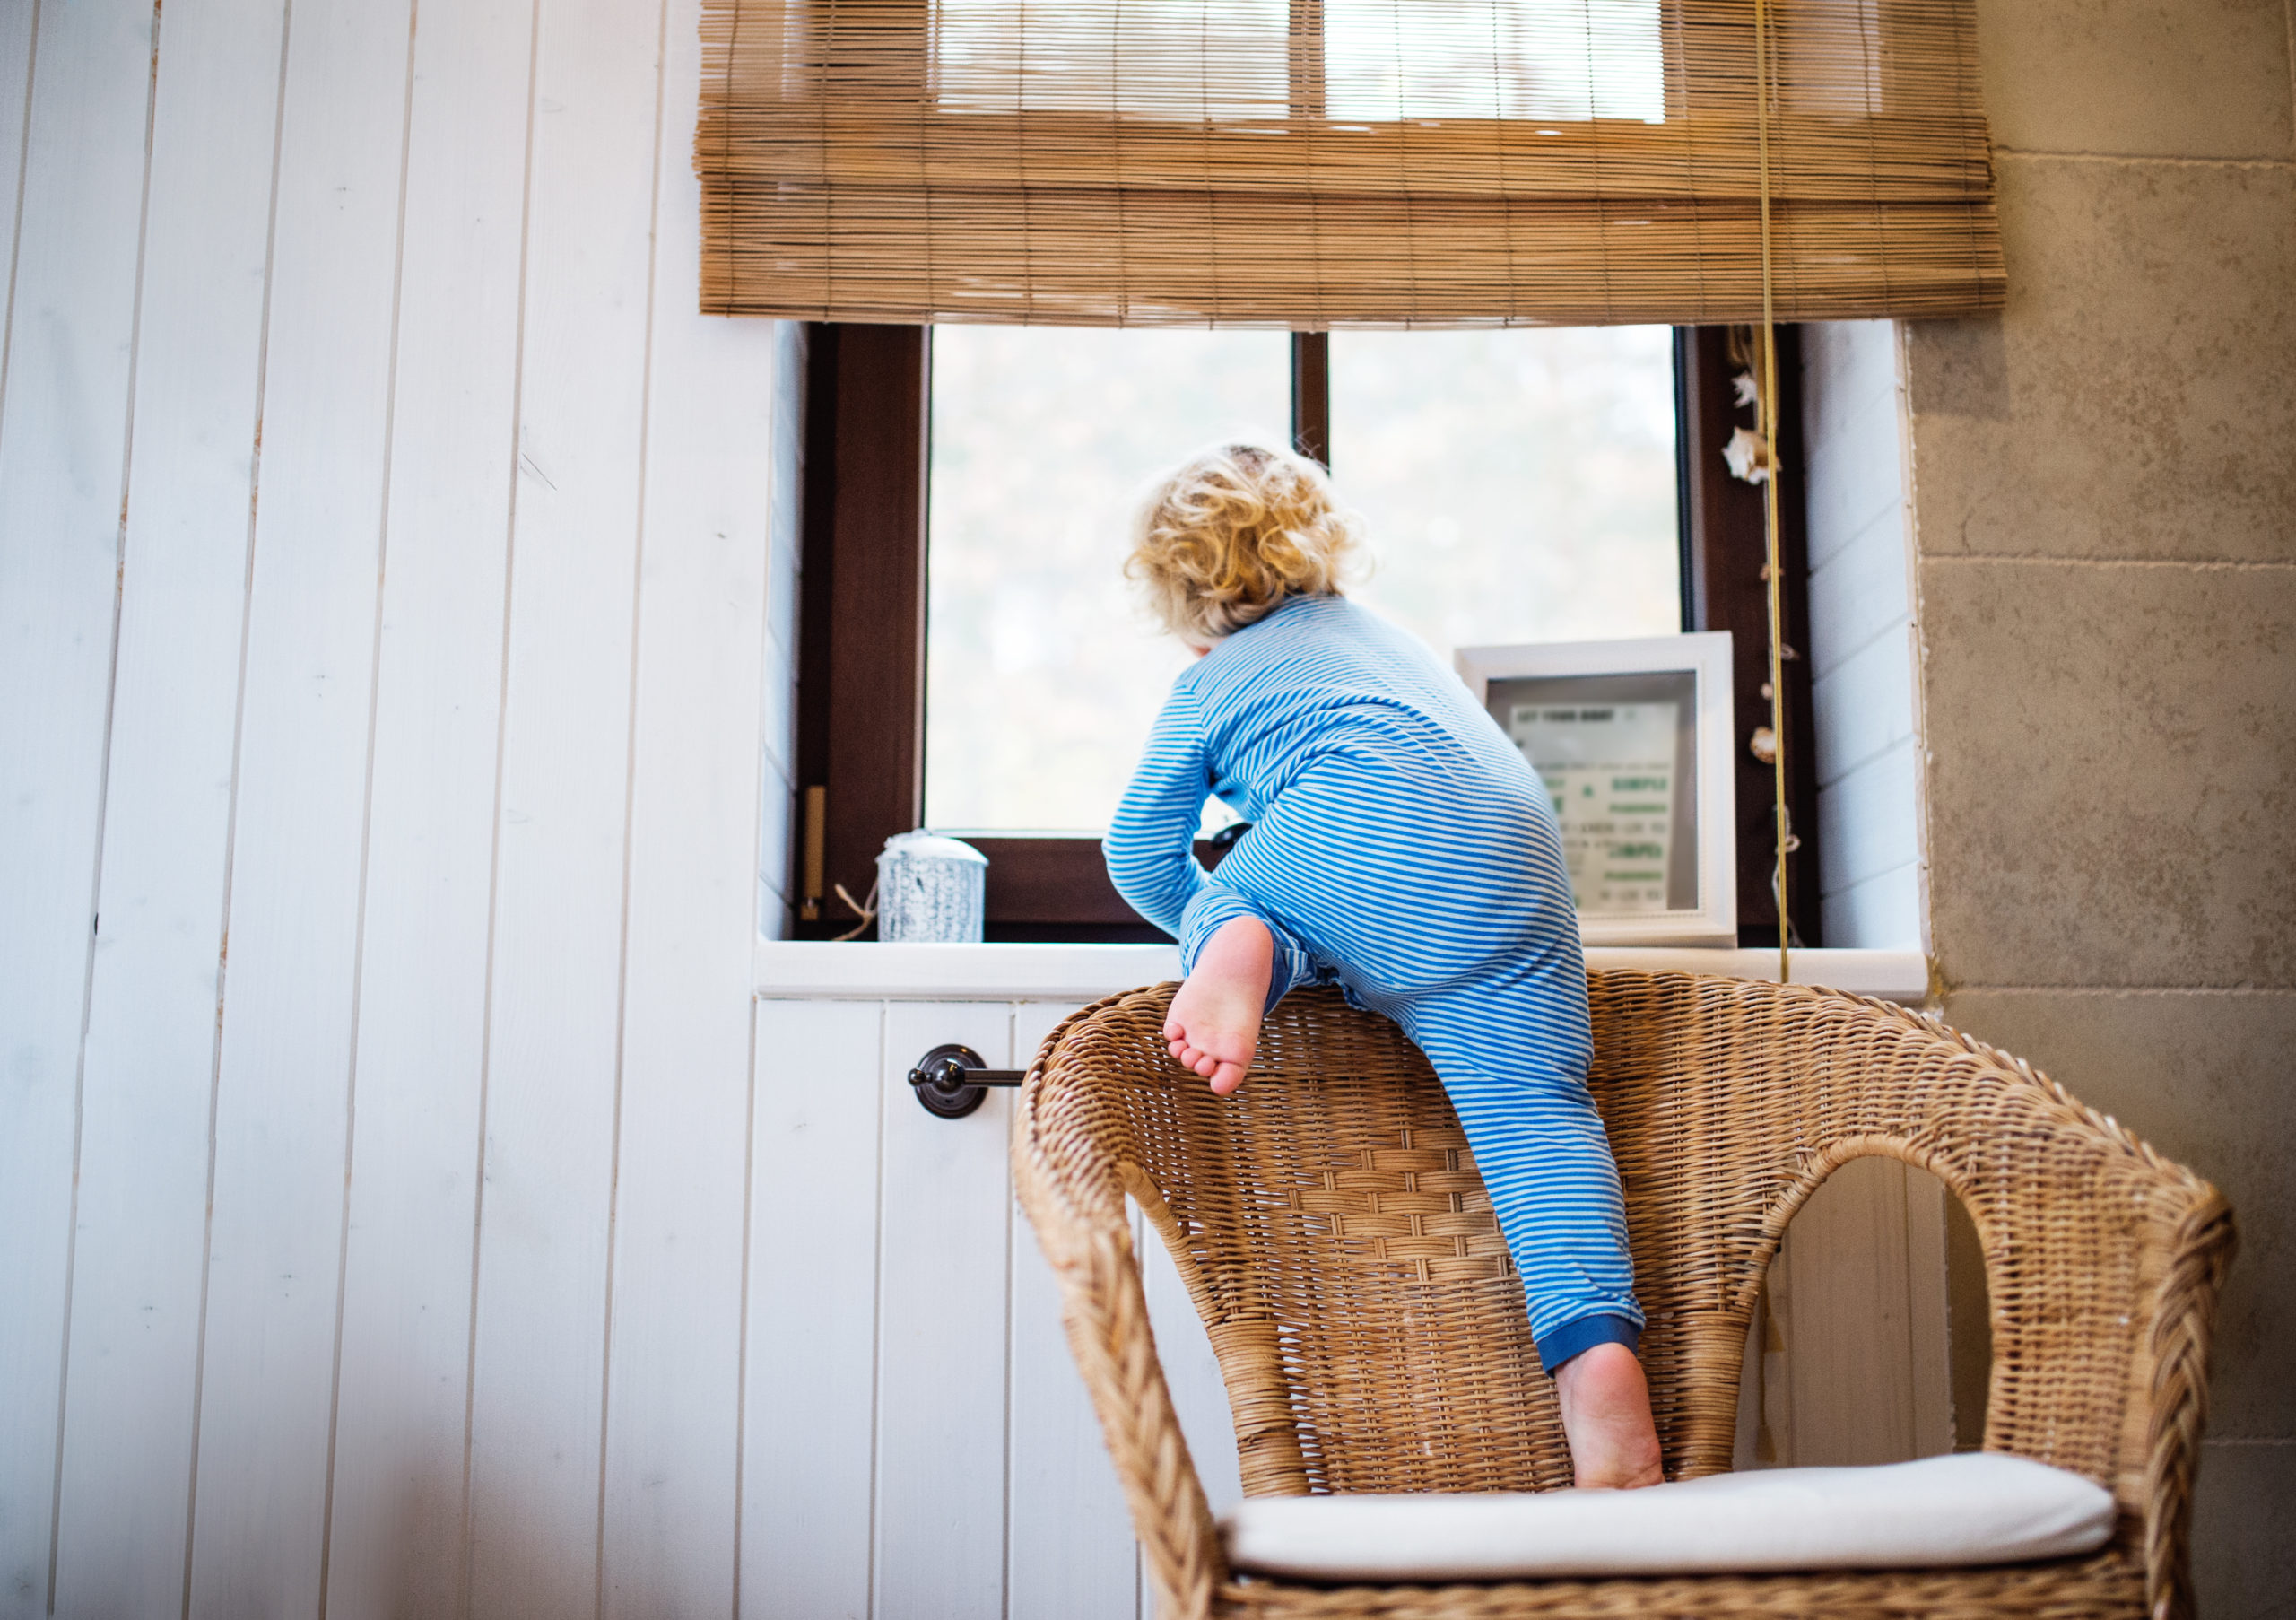

In [10]:
# image source: https://healthier.stanfordchildrens.org/wp-content/uploads/2021/04/Child-climbing-window-scaled.jpg

image_path = r"D:\Datasets\sofa_kid.jpg"
img = Image(filename=image_path, width=600, height=600)
img

In [11]:
def encode_image64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image64(image_path)

client = OpenAI(
    api_key = os.environ.get('OPENAI_API_KEY'),
)

In [13]:
def analyze_image(query):
    response = client.chat.completions.create(
      model= "gpt-4o",
      temperature = 0,
      messages=[
            {"role": "system", "content": "You are a baby sitter."},
            {"role": "user", "content": [
                {"type": "text", "text": query},
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image}"}
                }
            ]}
      ]
    )

    return response.choices[0].message.content

In [14]:
response_content = analyze_image("Do you see any dangerous sitation in the image? If yes, how to prevent it?")
print(response_content)

Yes, there is a potentially dangerous situation in the image. The child is climbing on a chair and leaning towards an open window, which poses a risk of falling.

To prevent this situation:
1. **Supervision**: Always supervise young children, especially when they are near windows or climbing on furniture.
2. **Window Guards**: Install window guards or safety bars to prevent children from falling out of windows.
3. **Furniture Placement**: Keep furniture away from windows to prevent children from climbing up and reaching the window.
4. **Lock Windows**: Ensure that windows are locked or have childproof locks to prevent them from being opened by children.
5. **Teach Safety**: Educate children about the dangers of climbing on furniture and leaning out of windows.

By taking these precautions, you can help ensure the safety of the child and prevent accidents.


## Graph Analysis

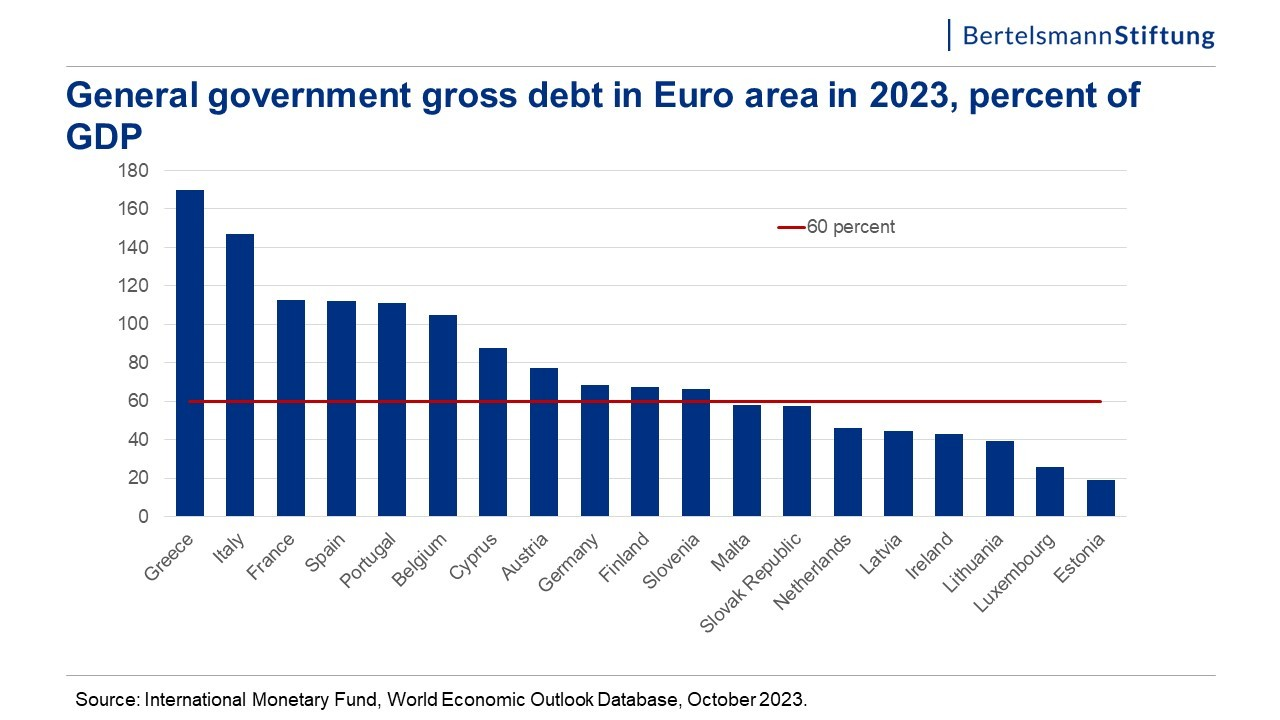

In [2]:
# image path: https://globaleurope.eu/wp-content/uploads/sites/24/2023/12/Folie2.jpg

image_path = r"D:\Datasets\Folie2.jpg"
img = Image(filename=image_path, width=800, height=800)
img

In [4]:
base64_image = encode_image64(image_path)

def analyze_graph(query):
    response = client.chat.completions.create(
      model= "gpt-4o",
      temperature = 0,
      messages=[
            {"role": "system", "content": "You are a an expert graph and visualization expert"},
            {"role": "user", "content": [
                {"type": "text", "text": query},
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image}"}
                }
            ]}
      ]
    )

    return response.choices[0].message.content

In [5]:
response_content = analyze_graph("Can you summarize the graph?")
print(response_content)

The graph displays the general government gross debt as a percentage of GDP for various Euro area countries in 2023. Here are the key points:

1. **Highest Debt Levels**: Greece has the highest debt level, exceeding 160% of GDP. Italy follows with a debt level above 140% of GDP.
2. **Moderate Debt Levels**: France, Spain, Portugal, Belgium, and Cyprus have debt levels ranging from approximately 100% to 120% of GDP.
3. **Debt Around 60%**: Countries like Germany, Finland, Slovenia, Malta, and the Slovak Republic have debt levels around the 60% mark, which is highlighted by a red line in the graph.
4. **Lower Debt Levels**: The Netherlands, Latvia, Ireland, Lithuania, Luxembourg, and Estonia have debt levels below 60%, with Estonia having the lowest debt level, below 20% of GDP.

The red line at 60% indicates a benchmark or threshold, possibly reflecting a target or standard for sustainable debt levels. Most countries in the Euro area have debt levels above this 60% threshold.


In [6]:
response_content = analyze_graph("Can you convert the graph to table such as Country -> Debt?")
print(response_content)

Sure, here is the table based on the graph:

| Country          | Debt (% of GDP) |
|------------------|-----------------|
| Greece           | 170             |
| Italy            | 140             |
| France           | 110             |
| Spain            | 110             |
| Portugal         | 110             |
| Belgium          | 100             |
| Cyprus           | 90              |
| Austria          | 80              |
| Germany          | 70              |
| Finland          | 70              |
| Slovenia         | 70              |
| Malta            | 60              |
| Slovak Republic  | 60              |
| Netherlands      | 50              |
| Latvia           | 40              |
| Ireland          | 40              |
| Lithuania        | 30              |
| Luxembourg       | 20              |
| Estonia          | 10              |

Note: The values are approximate as they are visually estimated from the graph.


## Image Sentiment Predicion

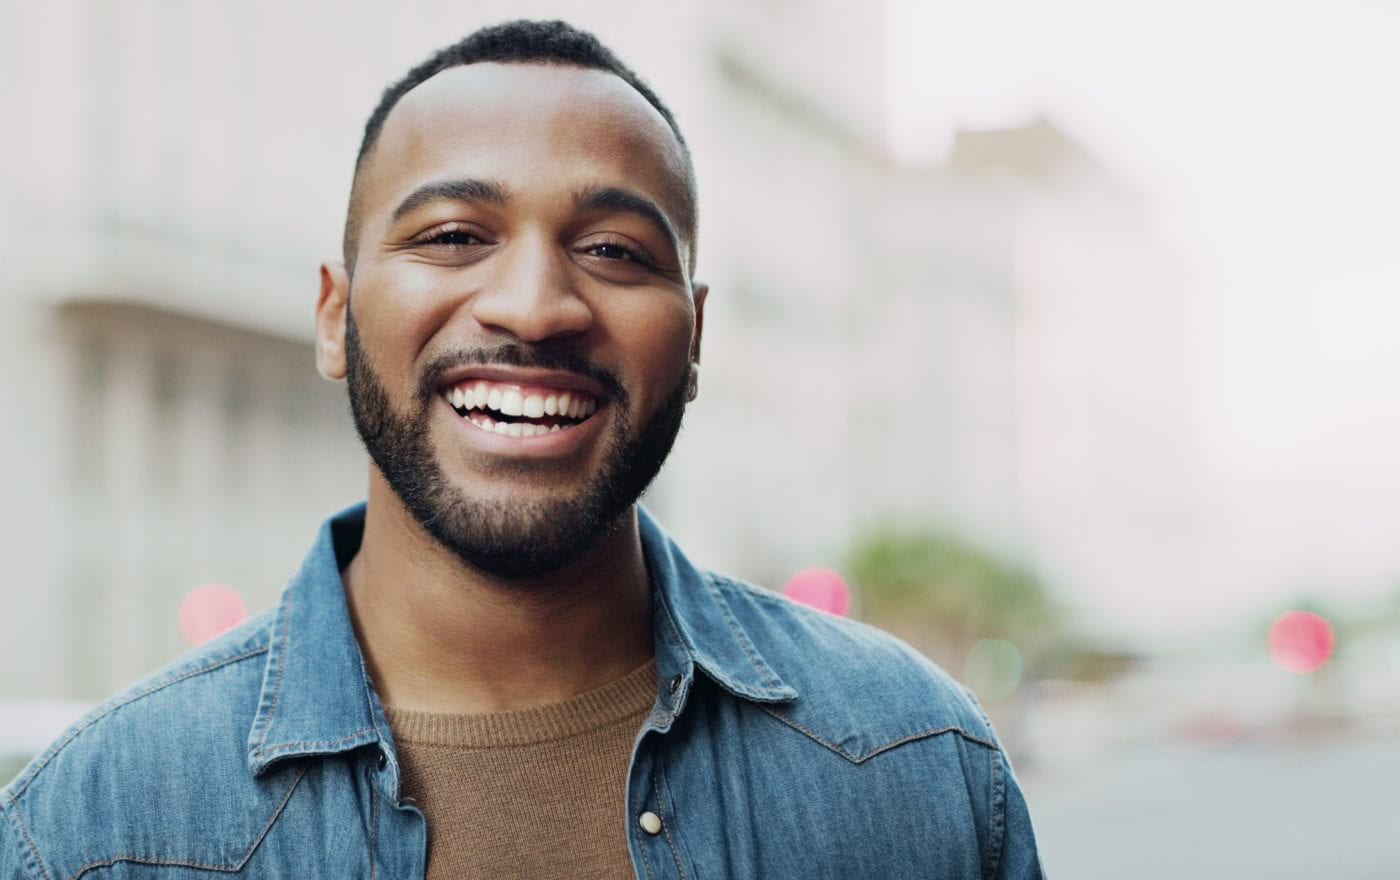

In [15]:
# image path: https://www.allprodad.com/the-3-happiest-people-in-the-world/

image_path = r"D:\Datasets\happy_men.jpg"
img = Image(filename=image_path, width=800, height=800)
img

In [18]:
base64_image = encode_image64(image_path)

def predict_sentiment(query):
    response = client.chat.completions.create(
      model= "gpt-4o",
      temperature = 0,
      messages=[
            {"role": "system", "content": "You are helpful psychologist."},
            {"role": "user", "content": [
                {"type": "text", "text": query},
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image}"}
                }
            ]}
      ]
    )

    return response.choices[0].message.content

response_content = predict_sentiment("Can you predict facial sentiment from the input image?")
print(response_content)

The person in the image appears to be smiling, which generally indicates a positive sentiment such as happiness or joy.


## Analyzing Multiple Images

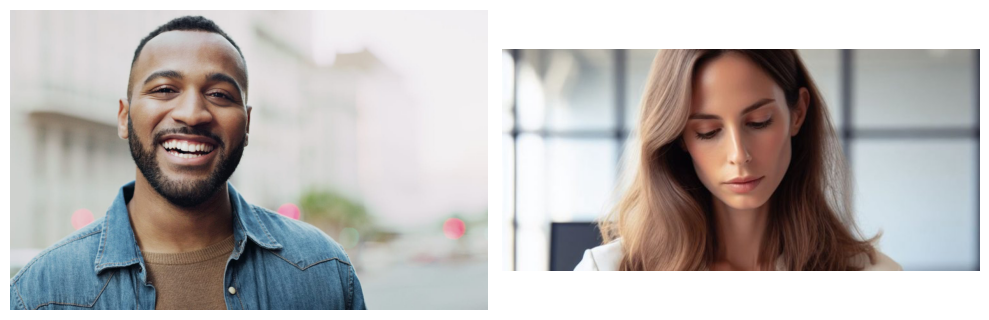

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

# image1_path: https://www.allprodad.com/the-3-happiest-people-in-the-world/
# image2_path: https://www.shortform.com/blog/self-care-for-grief/

image_path1 = r"D:\Datasets\happy_men.jpg"
image_path2 = r"D:\Datasets\sad_woman.jpg"


# Open the images using Pillow
img1 = Image.open(image_path1)
img2 = Image.open(image_path2)

# Create a figure to display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(img1)
axes[0].axis('off')  # Hide axes

# Display the second image
axes[1].imshow(img2)
axes[1].axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
base64_image1 = encode_image64(image_path1)
base64_image2 = encode_image64(image_path2)

def predict_sentiment(query):
    response = client.chat.completions.create(
      model= "gpt-4o",
      temperature = 0,
      messages=[
            {"role": "system", "content": "You are helpful psychologist."},
            {"role": "user", "content": [
                {"type": "text", "text": query},
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image1}"}},
                {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image2}"}}
            ]}
      ]
    )

    return response.choices[0].message.content

response_content = predict_sentiment("Can you explain all the differences in the two images?")
print(response_content)

Certainly! Here are the differences between the two images:

1. **Subject**:
   - The first image features a man.
   - The second image features a woman.

2. **Expression**:
   - The man in the first image is smiling broadly, showing his teeth.
   - The woman in the second image has a neutral or contemplative expression, with her lips closed.

3. **Background**:
   - The background in the first image is an outdoor, urban setting with blurred buildings and some colorful lights.
   - The background in the second image is an indoor setting, likely an office, with a blurred window or glass panel.

4. **Clothing**:
   - The man in the first image is wearing a denim jacket over a brown shirt.
   - The woman in the second image is wearing a white or light-colored top.

5. **Hair**:
   - The man in the first image has short, closely-cropped hair.
   - The woman in the second image has long, straight hair that falls over her shoulders.

6. **Lighting**:
   - The lighting in the first image appe